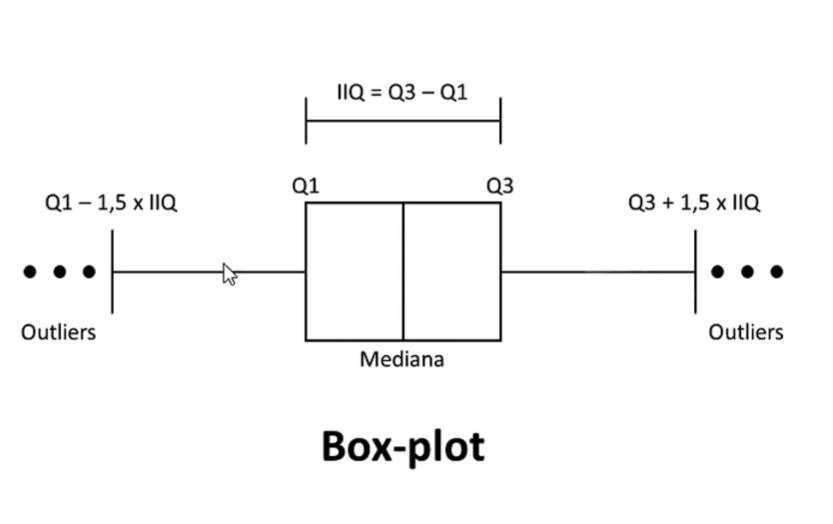

In [27]:
%matplotlib inline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(14, 6))

In [2]:
df = pd.read_csv("./aluguel.csv", sep=";")

In [3]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


<AxesSubplot: >

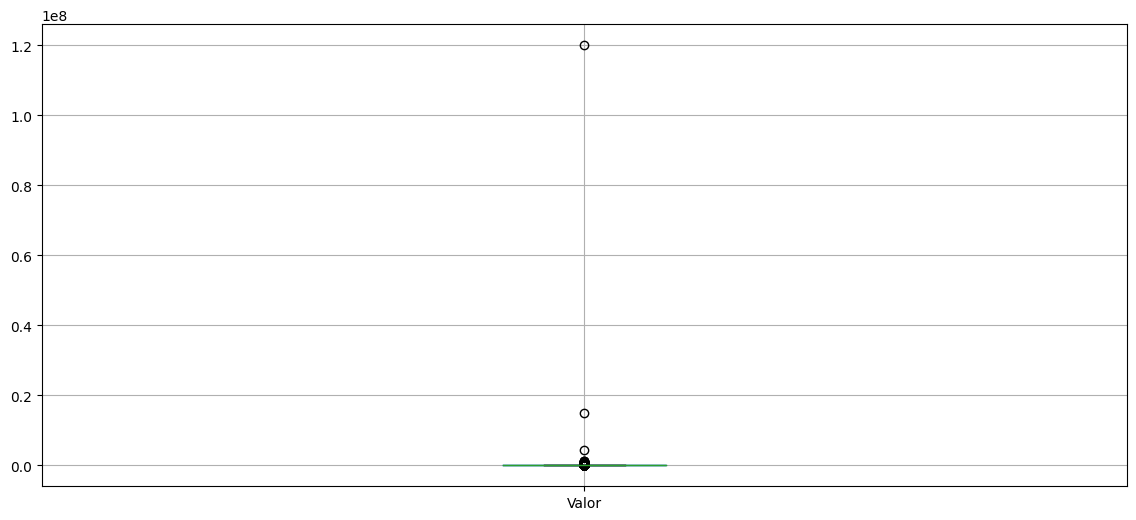

In [30]:
df.boxplot(["Valor"])

In [8]:
q_1 = df.Valor.quantile(.25)
q_3 = df.Valor.quantile(.75)
iiq = q_3 - q_1
limit_lower = q_1 - 1.5 * iiq
limit_biggest = q_3 + 1.5 * iiq

In [21]:
df.query("@limit_lower <= Valor <= @limit_biggest")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


<AxesSubplot: >

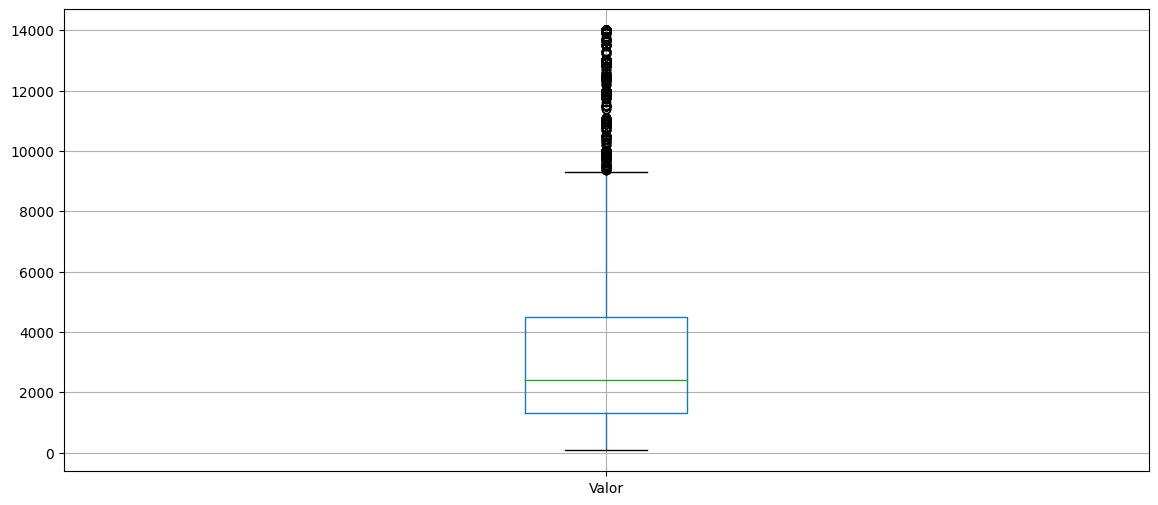

In [28]:
df.query("@limit_lower <= Valor <= @limit_biggest").boxplot(["Valor"])

array([[<AxesSubplot: title={'center': 'Valor'}>]], dtype=object)

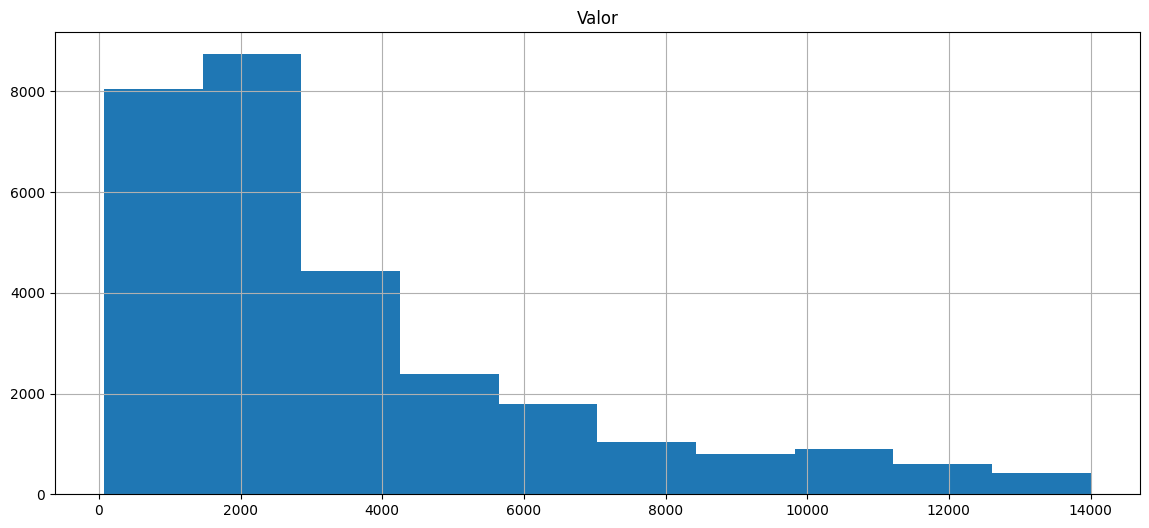

In [29]:
df.query("@limit_lower <= Valor <= @limit_biggest").hist(["Valor"])

<AxesSubplot: title={'center': 'Valor'}, xlabel='[Tipo]'>

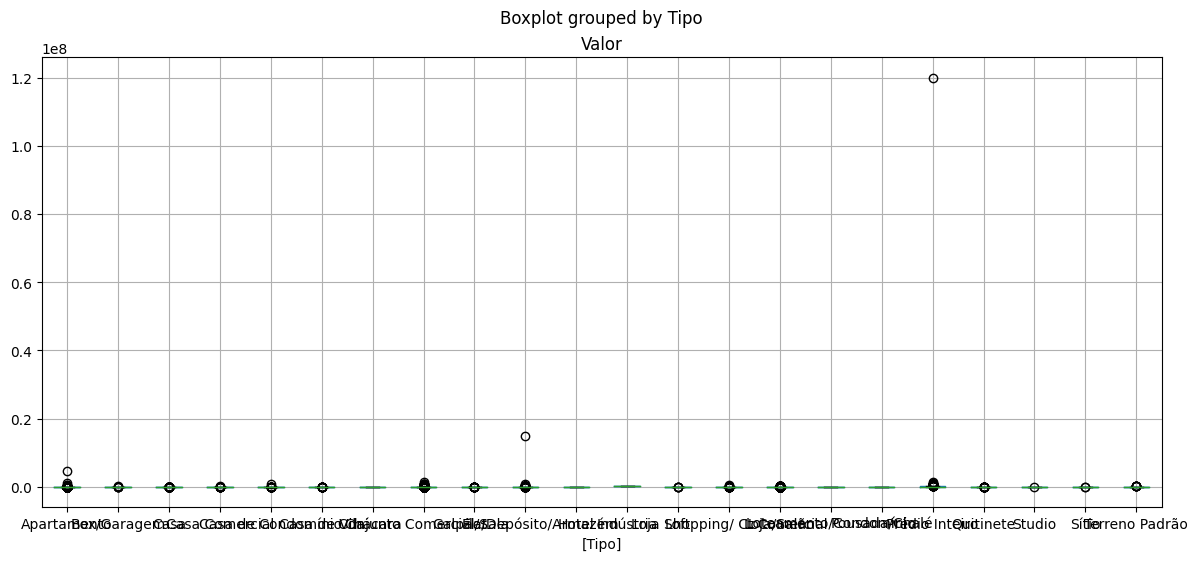

In [31]:
df.boxplot(["Valor"], by=["Tipo"])

In [33]:
s_group = df.groupby(["Tipo"])["Valor"]

In [35]:
q_1 = s_group.quantile(.25)
q_3 = s_group.quantile(.75)
iiq = q_3 - q_1
limit_lower = q_1 - 1.5 * iiq
limit_biggest = q_3 + 1.5 * iiq

In [47]:
pd.concat([
    df.query(
        "Tipo == @tipo"
        " & @limit_lower[@tipo] <= Valor <= @limit_biggest[@tipo]"
    ) for tipo in s_group.groups
])

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
27352,Terreno Padrão,Freguesia (Jacarepaguá),0,0,0,6000,35000.0,NaN,700.0
28257,Terreno Padrão,Botafogo,0,0,0,465,25000.0,NaN,2753.0
29629,Terreno Padrão,Curicica,0,0,0,1200,30000.0,NaN,500.0
30016,Terreno Padrão,Barra da Tijuca,1,0,0,529,35000.0,NaN,1222.0


<AxesSubplot: title={'center': 'Valor'}, xlabel='[Tipo]'>

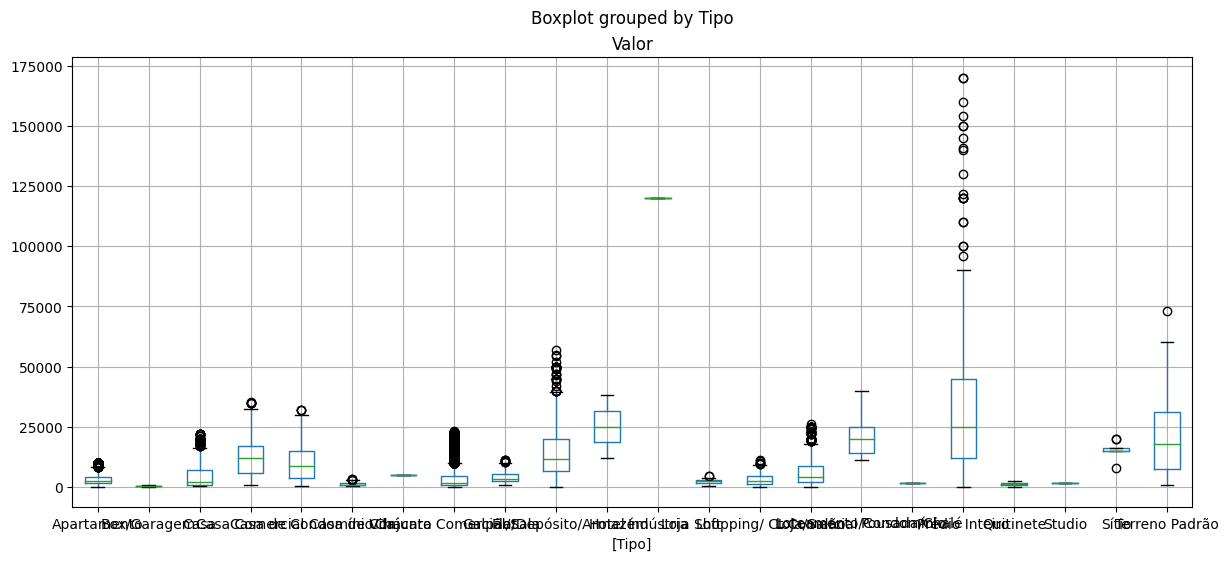

In [48]:
pd.concat([
    df.query(
        "Tipo == @tipo"
        " & @limit_lower[@tipo] <= Valor <= @limit_biggest[@tipo]"
    ) for tipo in s_group.groups
]).boxplot(["Valor"], by=["Tipo"])